# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 




In [ ]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib

     |████████████████████████████████| 1.5MB 9.2MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 1.4 MB 7.9 MB/s 
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434675 sha256=d041f6f2fd07dc123405af00520efd9bb983176488704914ec85d243cb41a8a3
  Stored in directory: /root/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 22.2 MB 8.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


# Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με περίπου 40.000 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset  στο dataframe `df_data_1`: 

In [ ]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

H ομάδα μας θα δουλέψει σε ένα μοναδικό υποσύνολο 5.000 ταινιών ,του παραπάνω dataset, που θα αποθηκεύσουμε στο dataframe df_data_2.



In [ ]:
import numpy as np

# βάλτε το seed που αντιστοιχεί στην ομάδα σας
team_seed_number = 79

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1EA_pUIgK5Ub3kEzFbFl8wSRqAV6feHqD"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=99` (την εκατοστή) θα γράψουμε `print(corpus[99])`.

In [ ]:
ID = 99
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['Atalia']
['"Romance Film",  "Melodrama",  "Drama"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="70%">

Η πρώτη εφαρμογή που θα αναπτύξουμε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξουμε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 


## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψουμε το corpus σε αναπαράσταση tf-idf:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#αρχικα δεν χρησιμοποιούμε παραμέτρους στην συνάρτηση TfidfVectorizer
vectorizer1 = TfidfVectorizer()
vectorizer1.fit(corpus)
corpus_tf_idf1 = vectorizer1.transform(corpus)

print(corpus_tf_idf1.shape)


(5000, 48884)


Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται παραπάνω **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης. 


------------------------------

## Υλοποίηση του συστήματος συστάσεων

Η βασική συνάρτηση του συστήματος μας ειναι η ***def content_recommender(target_movie, max_recommendations, corpus_tf_idf)***

Όπως παρατηρούμε δέχεται 3 ορίσματα:


*   **target_movie** : περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες


*    **max_recommendations** : περνάμε το πλήθος των προτεινόμενων ταινιών που επιθυμούμε να εμφανιστουν


*   **corpus_tf_idf** : copus vectorizer


Για την ταινία-στόχο, από το corpus_tf_idf υπολογίζουμε την ομοιότητα συνημιτόνου της με όλες τις ταινίες της συλλογής μας.

Με βάση την ομοιότητα συνημιτόνου που υπολογίσαμε, δημιουργούμε έναν ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (ID) των ταινιών. 

Για κάθε ταινία-στόχο εκτυπώνουμε: id, τίτλο, σύνοψη, κατηγορίες (categories)

Για τις max_recommendations ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώνουμε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), id, τίτλο, σύνοψη, κατηγορίες (categories).




In [ ]:
def mul_lines(text):
    temp=""
    for i in range(len(text)):
      if i%100==0 or i==len(text)-1:
        print(temp+"\n")
        temp=""
      temp=temp+text[i]


In [ ]:
 
from sklearn.metrics.pairwise import cosine_similarity

def content_recommender(corpus_tf_idf, target_movie,  max_recommendations):

    #κρατάμε το διάνυσμα της ταινίας στόχου
    target_tf_idf = corpus_tf_idf[target_movie]

    #υπολογιζουμε τις ομοιότητητες συνημιτόνου
    similarities = np.zeros(5000)

    for i in range(5000):
     current_sim = cosine_similarity(target_tf_idf, corpus_tf_idf[i])
     similarities[i] = current_sim

    # ταξινομούμε τις ταινίες σε φθίνουσα σειρά ομοιότητας
    id_sorted= np.argsort(similarities)[::-1]
    
   # εντυπώνουμε τα απαραίτητα στοιχεία για ταινίες στόχους και προτεινόμενες ταινίες
    for i in range(0,max_recommendations+1):

     if i==0:
      print("Target movie ",'\n')
     else:
      print("Recommended movie ",i,'\n')
     print("Id:" ,id_sorted[i],'\n' )
     print("Title:", titles[id_sorted[i]],'\n')
     print("Summary: " ,mul_lines(corpus[id_sorted[i]]) ,'\n')
     print("Categories: " ,categories[id_sorted[i]],'\n','\n')


## Βελτιστοποίηση

Θα προσπαθήσουμε να πετύχουμε μια βελτιστοποίηση των αποτελεσμάτων,κάνοντας αρχικά μια προεπεξεργασία στα κείμενα μας,στις περιλήψεις(corpus) των ταινιών δλδ.Στα πλάισια λοιπόν αυτής τις προεπεξεργασίας θα αφαιρέσουμε **σημέια στίξης**,μερικές συχνά χρησιμοποιούμενες λέξεις που δεν προσφέρουν σημασιολογική αξία στο κείμενο (**stopwords**) και τέλος θα κάνουμε και **stremming**.
 



In [ ]:
import nltk
from nltk.corpus import stopwords
import string 
from nltk.stem.porter import PorterStemmer
from tqdm import tqdm, tqdm_notebook
import joblib
from nltk.corpus import names


nltk.download('rslp')

nltk.download('stopwords') # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά
nltk.download('punkt') # χρειάζεται για το tokenizer
nltk.download('names')


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

In [ ]:
# συνάρτηση για αφαίρεση σημείων στίξης
def thorough_filter(words):
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words
        

def preprocess_corpus(doc): 
  words = nltk.word_tokenize(doc.lower())

  # αφαίρεση stopwords και σημείων στίξης
  filtered_words = [word for word in words if word not in stopwords.words('english') + list(string.punctuation)
  or (word[0].upper()+word[1:] not in names.words('male.txt') + names.words('female.txt'))]

  # επιπλέον αφαίρεση σημειων στίξης
  filtered_words = thorough_filter(filtered_words)

  # stemming
  porter_stemmer = PorterStemmer()
  ret_words = [porter_stemmer.stem(word) for word in filtered_words]

  return ' '.join(ret_words)
  

In [ ]:
preprocessed_documents = [preprocess_corpus(doc) for doc in corpus]

In [ ]:
joblib.dump(preprocessed_documents, 'preprocessed_documents.pkl')

['preprocessed_documents.pkl']

In [ ]:
!ls -lh

total 7.8M
-rw-r--r-- 1 root root 7.8M Dec 30 19:59 preprocessed_documents.pkl
drwxr-xr-x 1 root root 4.0K Dec 21 17:29 sample_data


In [ ]:
 preprocessed_documents= joblib.load('preprocessed_documents.pkl')

## **Δοκιμές για την βελτιστοποίηση του συστήματος μας**

### **1η δοκιμή**

In [ ]:
content_recommender(corpus_tf_idf1,200, 5)

Target movie  

Id: 200 

Title: ['Black Rainbow'] 



Rosanna Arquette stars as Martha Travis, a medium who hosts a touring clairvoyant show with her alco

holic father Walter  where she helps members of the audience make contact with deceased relatives. A

t one meeting, she foretells the violent death of a local factory employee , a whistleblower who was

 set to reveal corporate malpractice at the plant, and soon becomes the target of the killer herself

. At a subsequent meeting in the town, she appears to identify several other individuals who are set

 to die or be killed. A sceptical local journalist investigating the death, Gary Wallace , begins fo

llowing the couple and the story. The story is told in flashback, with the opening scenes showing Wa

llace searching for the reclusive Martha many years after the events depicted in the main body of th

e film

Summary:  None 

Categories:  ['"Thriller",  "Mystery",  "Horror",  "Psychological thriller",  "Supernatural"'] 
 

Recom

Τα παραπάνω αποτελέσματα θα λέγαμε ότι δεν είναι καθόλου ικανοποιητικά.

Η ταινία που επιλέξαμε με id=200 και τίτλο **A black Rainbow** διηγείται την ιστορία της Rosanna Arquette ,που έχει το χάρισμα να έρχεται σε επαφή με νεκρούς αλλα και να βλέπει οράματα με ανθρώπους που πρόκειται να σκοτωθούν.Σε μία μια συνάντηση, προφητεύει τον βίαιο θάνατο υπαλλήλου ενός τοπικού εργοστασίου,που ήταν έτοιμος να αποκαλύψει τις διαφθορές που γινόταν εντος του εργοαστασίου και σύντομα η Rosanna γίνεται και η ίδια στόχος του ίδιου του δολοφόνου. Ένας περίεργος τοπικός δημοσιογράφος  ο Gary Wallace , αρχίζει να παρακολουθεί την ιστορία να αναζητά την Rosanna πολλά χρόνια μετά τα γεγονότα που απεικονίζονται στο κύριο σώμα της ταινίας.Η ταινία υπάγεται στις κατηγορίες "Thriller",  "Mystery",  "Horror",  "Psychological thriller" και "Supernatural".

Από τις προτεινόμενες ταινίες που εμφανίζει το σύστημα μας,η πρώτη με τίτλο **These Three** , είναι περισσότερο "Μelodrama" και αφορά το ερωτικό μπλέξιμο δυο γυναικων,της Karen και της Martha,που είναι δασκάλες, με τον ίδιο άντρα και την "καταστροφή" που προκαλείεται απο το ψέμα ενός μαθητή τους.

Η δεύτερη,με τίτλο **Babel** αφορά την  τραγωδία που χτυπά ένα παντρεμένο ζευγάρι σε διακοπές στην έρημο του Μαρόκου, ξετυλίγοντας μια αλληλένδετη ιστορία με τέσσερις διαφορετικές οικογένειες.Υπάγεται στην κατηγορία "Drama".

Η τρίτη,με τίτλο **Life, and Nothing More...** αφορά την  ενηλικίωση, του Άντριου που λαχταρά να βρει τον σκοπό του ως νεαρός μαύρος στη σημερινή Αμερική. Με τη μητέρα του να επιθυμεί να βρει περισσότερα στη ζωή της παρά στην ανατροφή των παιδιών, ο Andrew αναγκάζεται να αναλάβει την αυξανόμενη πίεση της οικογενειακής ευθύνης. Η αναζήτησή του για σύνδεση με έναν απόντα πατέρα, τον οδηγεί σε ένα επικίνδυνο σταυροδρόμι.Υπάγεται στην κατηγορία "Drama".

Η τέταρτη, με τίτλο **All the King's Men** , είναι βασισμένη στο μυθιστόρημα του Robert Penn Warren και αφορά την ζωή του λαϊκιστή  πολιτικόύ Southerner Willie Stark.Πρόκειται κυρίως για ταινία δράσης.

Η πέμπτη με τίτλο **Convoy** αφορά την  βεντέτα οδηγών φορτηγών με έναν καταχρηστικό σερίφη.Είναι κυρίως μια ταινία δράσης-περιπέτειας.

Παρατηρούμε λοιπόν οτι οι παραπάνω ταινίες με μια πρωτη ματία δεν έχουν κάποιο κοινό άξονα όσον αφορά το περιεχόμενο τους.






### **2η δοκιμή**

Αρχικά θα χρησιμοποιήσουμε τις περιλήψεις των ταινιών που έχουν υποστει **προεπεξεργασία**

In [ ]:
vectorizer2 = TfidfVectorizer()
vectorizer2.fit(preprocessed_documents)
corpus_tf_idf2 = vectorizer2.transform(preprocessed_documents)

print(corpus_tf_idf2.shape)

(5000, 35913)


In [ ]:
content_recommender(corpus_tf_idf2,200, 5)

Target movie  

Id: 200 

Title: ['Black Rainbow'] 



Rosanna Arquette stars as Martha Travis, a medium who hosts a touring clairvoyant show with her alco

holic father Walter  where she helps members of the audience make contact with deceased relatives. A

t one meeting, she foretells the violent death of a local factory employee , a whistleblower who was

 set to reveal corporate malpractice at the plant, and soon becomes the target of the killer herself

. At a subsequent meeting in the town, she appears to identify several other individuals who are set

 to die or be killed. A sceptical local journalist investigating the death, Gary Wallace , begins fo

llowing the couple and the story. The story is told in flashback, with the opening scenes showing Wa

llace searching for the reclusive Martha many years after the events depicted in the main body of th

e film

Summary:  None 

Categories:  ['"Thriller",  "Mystery",  "Horror",  "Psychological thriller",  "Supernatural"'] 
 

Recom

Παρατηρούμε οτι δυστυχώς παρα την μείωση της διαστατικότητας των δεδομένων που πετύχαμε,δεν άλλαξαν οι προτεινόμενες ταινίες παρά μόνο η σειρά εμφάνισης τους.

### **3η δοκιμή**

Ακολούθως θα εισάγουμε παραμέτρους στην συνάρτηση **TfidfVectorizer**.

In [ ]:
vectorizer3 = TfidfVectorizer(stop_words='english')
vectorizer3.fit(preprocessed_documents)
corpus_tf_idf3 = vectorizer3.transform(preprocessed_documents)

print(corpus_tf_idf3.shape)

(5000, 35675)


In [ ]:
content_recommender(corpus_tf_idf3,200, 5)

Target movie  

Id: 200 

Title: ['Black Rainbow'] 



Rosanna Arquette stars as Martha Travis, a medium who hosts a touring clairvoyant show with her alco

holic father Walter  where she helps members of the audience make contact with deceased relatives. A

t one meeting, she foretells the violent death of a local factory employee , a whistleblower who was

 set to reveal corporate malpractice at the plant, and soon becomes the target of the killer herself

. At a subsequent meeting in the town, she appears to identify several other individuals who are set

 to die or be killed. A sceptical local journalist investigating the death, Gary Wallace , begins fo

llowing the couple and the story. The story is told in flashback, with the opening scenes showing Wa

llace searching for the reclusive Martha many years after the events depicted in the main body of th

e film

Summary:  None 

Categories:  ['"Thriller",  "Mystery",  "Horror",  "Psychological thriller",  "Supernatural"'] 
 

Recom

Δεν παρατηρείται μεταβολή  στις προτεινόμενες ταινίες(μόνο στην σειρά προτάσεων των ταινίων).

### **4η δοκιμή**

In [ ]:
vectorizer4 = TfidfVectorizer(stop_words='english', max_df=0.75, min_df=15)
vectorizer4.fit(preprocessed_documents)
corpus_tf_idf4 = vectorizer4.transform(preprocessed_documents)

print(corpus_tf_idf4.shape)

(5000, 4604)


In [ ]:
content_recommender(corpus_tf_idf4,200, 5)

Target movie  

Id: 200 

Title: ['Black Rainbow'] 



Rosanna Arquette stars as Martha Travis, a medium who hosts a touring clairvoyant show with her alco

holic father Walter  where she helps members of the audience make contact with deceased relatives. A

t one meeting, she foretells the violent death of a local factory employee , a whistleblower who was

 set to reveal corporate malpractice at the plant, and soon becomes the target of the killer herself

. At a subsequent meeting in the town, she appears to identify several other individuals who are set

 to die or be killed. A sceptical local journalist investigating the death, Gary Wallace , begins fo

llowing the couple and the story. The story is told in flashback, with the opening scenes showing Wa

llace searching for the reclusive Martha many years after the events depicted in the main body of th

e film

Summary:  None 

Categories:  ['"Thriller",  "Mystery",  "Horror",  "Psychological thriller",  "Supernatural"'] 
 

Recom

Παρατηρούμε εντελώς διαφορετικά αποτελέσματα σε σχέση με τις τρεις προηγούμνες δοκιμές.

Στην πρώτη ταινία που προτείνεται,με τίτλο **Year of The Devil** , ο Ολλανδός σκηνοθέτης ντοκιμαντέρ, Jan Holman, πηγαίνει στην Τσεχική Δημοκρατία για να κάνει μια ταινία για τη θεραπεία του αλκοολισμού. Σε μια συνάντηση ανώνυμων αλκοολικών βρίσκει έναν άνδρα με το όνομα Jaromir Nohavica που γίνεται φίλος του. Ένας άλλος φίλος του Nohavica, ο Karel Plihal, γίνεται μουγκός και ο Nohavica αποφασίζει να ξεκινήσει μια περιοδεία με το συγκρότημα Čechomor για να τον βοηθήσει να τον θεραπεύσει. Όταν ο Jan Holman ακολουθεί με τη φωτογραφική του μηχανή, βρίσκει πολλά ανεξήγητα γεγονότα στην πορεία.Οπότε σε σχέση με την target movie έχουμε το κοινό στοιχείο της περιοδείας,του αλκοολισμου(στην Black Rainbow είχαμε έναν αλκοολικό πατέρα) και των περίεργων γεγονότων.

Ακολουθεί η τανία,**Johnny Gaddaar**, που αφορά μια συμμορία 5 ατόμων που διευθύνουν μια λέσχη τυχερών παιχνιδιών.Τα κοινα στοιχεία με την target movie είναι οι φόνοι που γίνονται καθώς και το στοιχείο της αναδρομής καθώς ξετυλίγεται η πλοκή της ταινίας.

Η τρίτη πρόταση του συστήματος μας είναι η ταινία με τίτλο **Hannah and Her Sisters**, η οποία δεν φαίνεται να έχει καποιο κοινό στοιχείο με την target movie πέρα από τα flashbacks.

Η επόμενη πρόταση είναι η ταινία **Anwar**,που αφορά το ταξίδι ενός νεαρού αντρα απο την Μαλαισία στην προσπάθεια του να μπει στα αδυτα της τρομακρατίας.Και αυτή η ιστορία ξετυλίγεται με flashbacks ενώ έχουμε και εδώ το στοιχείο του  φόνου-θανάτου.

Και η 5η πρόταση είναι η ταινία **Prom Night**,όπου οι 11χρονοι Wendy Richards, Jude Cunningham, Kelly Lynch και Nick McBride παίζουν κρυφτό σε ένα εγκαταλελειμμένο μοναστήρι. Η 10χρονη Robin Hammond τους πλησιάζει, αλλά αρχίζουν να την πειράζουν επαναλαμβάνοντας "Kil l! Kill! Kill!". Επιστρέφει σε ένα παράθυρο και πέφτει πάνω σε τζάμια με αποτέλεσμα να σκοτωθεί και απο εκέι και πέρα εκτυλίσσεται μια σειρά γεγονότων.To κοινό στοιχείο με την target movie είναι ο φονος(kill).

Μπορούμε να πούμε ότι παίρνουμε σχετικά ικανοποιητικά αποτελέσματα σε σχέση με τις προηγούμενες δοκιμές.Ας δούμε τωρα τι αποτελέσματα έχουμε τωρα και για άλλες target movies.



## **Δοκιμές τελικού συστηματος** 

### **target movie id=55**

In [ ]:
content_recommender(corpus_tf_idf4, 50, 5)

Target movie  

Id: 50 

Title: ['New Police Story'] 



 The film begins with police Inspector Chan Kwok-wing  drinking one whiskey after another. Later, he

 collapses in an alley, and is found by a stranger, played by Nicholas Tse. The timeline then moves 

back a year, to show the heroics of Inspector Chan, as he disguises himself as a news cameraman in o

rder to subdue a man holding a woman hostage in Central. Soon after that incident, a group of rebell

ious youths rob a bank. They explicitly ask a bank worker to call the police, and are confronted by 

the police outside the Legislative Council building. They play a sadistic game, in which they are aw

arded money for shooting police officers with assault rifles, before making their escape. Inspector 

Chan and his squad are called to arrest the gang after their hideout is revealed. However, the hideo

ut is rigged and the ten man police squad fall into various traps one by one. Chan then finds his me

n in a large warehouse, s

Κοινος θεματικος αξονας των παραπάνω ταινιών -> money, police, gang,kill, investigation, authorities


### **target movie id=100**

In [ ]:
content_recommender(corpus_tf_idf4,100, 5)

Target movie  

Id: 100 

Title: ['The Next Big Thing'] 



Gus Bishop is a talented but failing New York painter who lacks the marketing savvy to make it in to

day's art world. After getting pick-pocketed in the subway, Gus' destiny is turned over into the han

ds of Deech—who promptly burglarizes his home and steals his paintings. To capitalize on his stolen 

goods, Deech generates interest in Gus' work by creating Geoffrey Boiardi, a fictional artist with a

 fascinating profile. Geoffrey becomes an overnight sensation while Gus is forced into the shadows o

f the ever-illusive rising star

Summary:  None 

Categories:  ['"Romantic comedy",  "Romance Film",  "Comedy",  "Indie"'] 
 

Recommended movie  1 

Id: 3827 

Title: ['A Reason to Live'] 



The Stewarts were once a happy family, but trouble starts when wife Delores announces she wants to d

ivorce her husband Gus. Gus, who loves his wife very much, is not able to deal with this. Problems o

nly get bigger when he also loses

κοινές λέξεις προτεινόμενων ταινιών με target movie -> painters, art , artist , gallery, New York, star

### **target movie id=217**

In [ ]:
content_recommender(corpus_tf_idf4,217, 5)

Target movie  

Id: 217 

Title: ['Harry Potter and the Half-Blood Prince'] 



 Harry is shown bleeding in front of the Ministry of Magic, as the result of an attack that took pla

ce after the second-to-last scene of the previous film, Harry Potter and the Order of the Phoenix. L

ord Voldemort is tightening his grip on both the Wizarding and Muggle worlds and has chosen Draco Ma

lfoy to carry out a secret mission. Severus Snape accepts Bellatrix Lestrange's challenge to make an

 Unbreakable Vow with Draco's mother, Narcissa, to protect Draco and fulfill the assignment if he fa

ils. Harry accompanies Albus Dumbledore to visit former potions professor Horace Slughorn, who has g

one into hiding. Slughorn agrees to return to teach at Hogwarts as Dumbledore tells Harry that Slugh

orn's return to Hogwarts is crucial. Leaving Fred and George's new shop, Harry, Ron and Hermione not

ice Draco and Narcissa associating with Death Eaters in Borgin and Burkes. Harry believes Voldemort 

ha

Η target movie ανήκει στην γνωστή σειρά ταινιών Harry Potter.Οπότε όπως ηταν αναμενόμενο οι 3 απο τις 5 προτεινόμνες ταινίες ανήκουν σε αυτη την σειρά και οι άλλες 2 έχουν πρωταγωνιστή με το όνομα Harry(οχι ιδιαίτερα καλό,καθώς θα πρεπε να ειχαν αφαιρεθει τα ονόματα αυτά στο στάδιο της προεπεξεργασιας ώστε να μην επηρεάσουν το αποτέλεσμα)  και με καποιες,μικρες δυστυχώς,στην θεματολογία ομοιότητες με την target movie.

### **target movie=170**

In [ ]:
content_recommender(corpus_tf_idf4,170, 5)

Target movie  

Id: 170 

Title: ['Kami'] 



The film is about two young runaway teenagers who meet in the city after leaving their respective ho

mes in different states. Tookoo  the elder of the two, who was first in the city, "adopts" Din  and 

as their relationship develops, is both big brother and father to Din. And as the film progresses we

 see how Tookoo dreams of being a successful pop singer, and how he and Din survive in the city, col

lecting recyclable items for sale. We are touched by what these two teenagers go through in the conc

rete jungle of the city as they are bullied by gangs who rob them of their hard-earned money, cheate

d by dishonest employers who do not pay them and traumatised by over-zealous police who arrest Tooko

o by mistake

Summary:  None 

Categories:  ['"Drama"'] 
 

Recommended movie  1 

Id: 1959 

Title: ['Memories'] 



{{Plot|dateMagnetic RoseStink BombCannon Fodder In a walled city perpetually at war, everyone's live

lihood depends upon 

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM
<img src="https://i.imgur.com/Z4FdurD.jpg" width="60%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους (ο παραπάνω χάρτης είναι ενδεικτικός, δεν αντιστοιχεί στο dataset μας). 

Η `build_final_set` αρχικά μετατρέπει την αραιή αναπαράσταση tf-idf της εξόδου της `TfidfVectorizer()` σε πυκνή (η [αραιή αναπαράσταση](https://en.wikipedia.org/wiki/Sparse_matrix) έχει τιμές μόνο για τα μη μηδενικά στοιχεία). 

Στη συνέχεια ενώνει την πυκνή `dense_tf_idf` αναπαράσταση και τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον στήλες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά του TFIDF και τις κατηγορίες της.

Τέλος, δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο καθώς μπορούμε αν θέλουμε να φτιάχνουμε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM.

In [ ]:
#Στη συνάρτηση θα χρησιμοποιήσουμε το corpus_tf_idf4, καθώς αυτό επιλέχτηκε ως βέλτιστο από την εφαρμογή 1.
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf4.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομένα σε float32
    return np.array(final_set, dtype=np.float32)

In [ ]:
final_set = build_final_set(5000)

Τυπώνουμε τις διαστάσεις του τελικού dataset μας. Χωρίς βελτιστοποίηση του TFIDF θα έχουμε περίπου 50.000 χαρακτηριστικά.

In [ ]:
final_set.shape

(5000, 4926)

Με βάση την εμπειρία σας στην προετοιμασία των δεδομένων στην επιβλεπόμενη μάθηση, υπάρχει κάποιο βήμα προεπεξεργασίας που θα μπορούσε να εφαρμοστεί σε αυτό το dataset; 

**Απάντηση:** Με βάση τα όσα είδαμε και στην προηγούμενη εργαστηριακή άσκηση, μια καλή ιδέα για την προετοιμασία των δεδομένων μας θα ήταν η εφαρμογή της μεθόδου PCA αντί της παραπάνω συνάρτησης, ώστε να γίνει πιο πυκνό το dataset μας.

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [ ]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

     |████████████████████████████████| 6.1 MB 7.2 MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp36-cp36m-linux_x86_64.whl size=421006 sha256=8aeb0058e8c998dab724f2f565ec314bbb32a63fa1f6beccde342d31a7c668e8
  Stored in directory: /root/.cache/pip/wheels/69/4c/18/b5f05a068134b3d70d4060a06d2cd9080fa21084dc876f51e3
Successfully built somoclu


Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. Ενδεικτικά, με σωστή κωδικοποίηση tf-idf, μικροί χάρτες για λίγα δεδομένα (1000-2000) παίρνουν γύρω στο ένα λεπτό ενώ μεγαλύτεροι χάρτες με όλα τα δεδομένα μπορούν να πάρουν 10-15 λεπτά ή και περισσότερο.


###**Τρόπος εκπαίδευσης και επιλογή παραμέτρων:**

Αρχικά, δημιουργήσαμε έναν χάρτη με δοκιμαστικές παραμέτρους ώστε να αποκτήσουμε μια εξοικείωση με την διαδικασία. Επιλέχθηκε ένα υποσύνολο των ταινιών (2000) και ένας μικρού μεγέθους χάρτης (10x10), με 50 εποχές εκπαίδευσης.

Στη συνέχεια έπειτα από διάφορους πειραματισμούς, καταλήξαμε στο ότι το **100** είναι ένα ικανοποιητικό **πλήθος εποχών** καθώς, είναι αρκετά μεγάλο ώστε να γίνει μια άρτια εκπαίδευση, αλλά όχι τόσο μεγάλο ώστε να γίνει κοστοβόρο ενεργειακά και χρονικά. Παράλληλα σε όλες τις δοκιμές εκπαίδευσης (πλην της πρώτης), χρησιμοποιείται όλο το πλήθος ταινιών (5000). Γενικά, η διαδικασία της εκαπίδευσης ενός χάρτη SOM απαιτεί μεγάλους χρόνους εκτέλεσης οι οποίοι δεν οφείλονται τόσο στο πλήθος των εποχών εκπαίδευσης όσο στο μέγεθος του χάρτη που επιλέγεται.  

Όσον αφορά στο μέγεθος του χάρτη, δοκιμάσαμε κάποιες "κλασσικές" τιμές, δηλαδή: **20x20**, **25x25**, **30x30**. Ανάμεσα σε αυτές καταλήξαμε στο ότι η καλύτερη επιλογή ήταν εκείνη του χάρτη 30x30. Θα μπορούσαμε να είχαμε πειραματιστεί και με περαιτέρω μεγέθη (ακόμη και μεγαλύτερα από 30x30) όμως αφενός, ο χάρτης που επιλέχθηκε ως βέλτιστος μας έδινε αρκετά ικανοποιητικά αποτελέσματα και αφετέρου η χρονοβόρα διαδικασία της εκτέλεσης μας περιόριζε σε μεγάλο βαθμό (ενδεικτικά ο χάρτης 30x30 απαιτούσε σχεδόν 4 ώρες εκπαίδευσης όπως φαίνεται και παρακάτω).

Παρ'ολο που σε επόμενο ερώτημα ζητείται U-matrix, εμείς το χρησιμοποιούμε και εδώ ως μετρική για την επιλογή του μεγέθους του χάρτη. Επιλέξαμε λοιπόν τον 30x30 διότι, όπως φαίνεται και στον U-matrix, έχουμε μεγάλο πλήθος μικρών πράσινο-μπλε περιοχών που διαχωρίζονται μεταξύ τους με διακριτά σύνορα από κίτρινο-κόκκινες περιοχές. Μάλιστα οι τελευταίες δεν είναι πολύ μεγάλες, μαρτυρώντας μικρή απόσταση μεταξύ γειτονικών νευρώνων. Τέλος, απουσιάζουν περιοχές με έντονο κόκκινο χρώμα, γεγονός που συνεπάγεται την απουσία απομονωμένων νευρώνων. 

(Σημείωση: Στις πρώτες εκτελέσεις ο U-matrix που είχε προκύψει ήταν ελαφρώς καλύτερος από αυτόν της τελικής εκτέλεσης)








In [ ]:
#Δημιουργούμε ενα δοκιμαστικό final_set2, το οποίο περιέχει ένα υποσύνολο των ταινιών (2000).
final_set2= final_set[0:1999]
final_set2.shape

(1999, 4926)

In [ ]:
#imports των απαραίτητων βιβλιοθηκών
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline
#Εκπαίδευση του χάρτη με βάση τον κώδικα στα Notebooks των εργαστηρίων.
n_rows, n_columns = 10, 10
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False, kerneltype=1)
%time som.train(data=final_set2, epochs=50)


CPU times: user 5min 21s, sys: 825 ms, total: 5min 22s
Wall time: 2min 44s


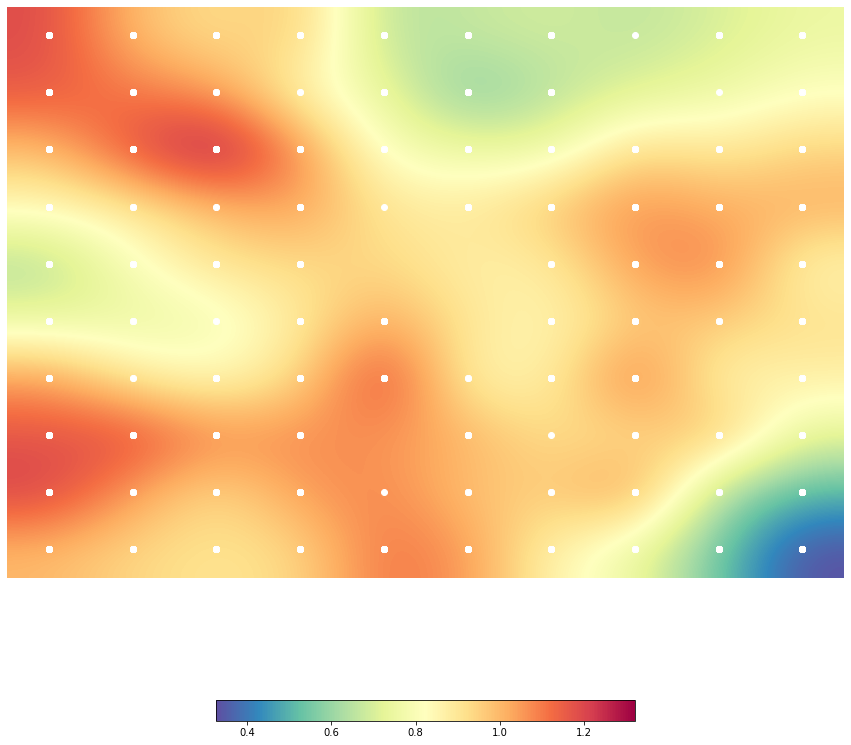

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15,15))

In [ ]:
n_rows, n_columns = 20, 20
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False, kerneltype=1)
%time som.train(data=final_set, epochs=100)

CPU times: user 1h 47min 26s, sys: 10.5 s, total: 1h 47min 36s
Wall time: 54min 21s


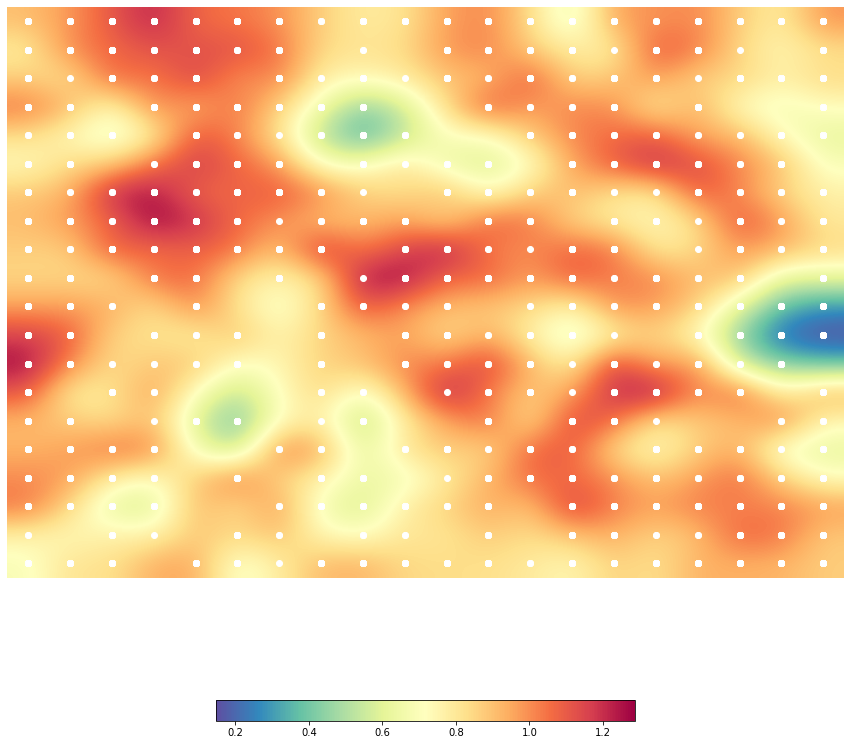

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15,15))

In [ ]:
n_rows, n_columns = 25, 25
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False, kerneltype=1)
%time som.train(data=final_set, epochs=100)

CPU times: user 2h 46min 25s, sys: 17.2 s, total: 2h 46min 42s
Wall time: 1h 25min 58s


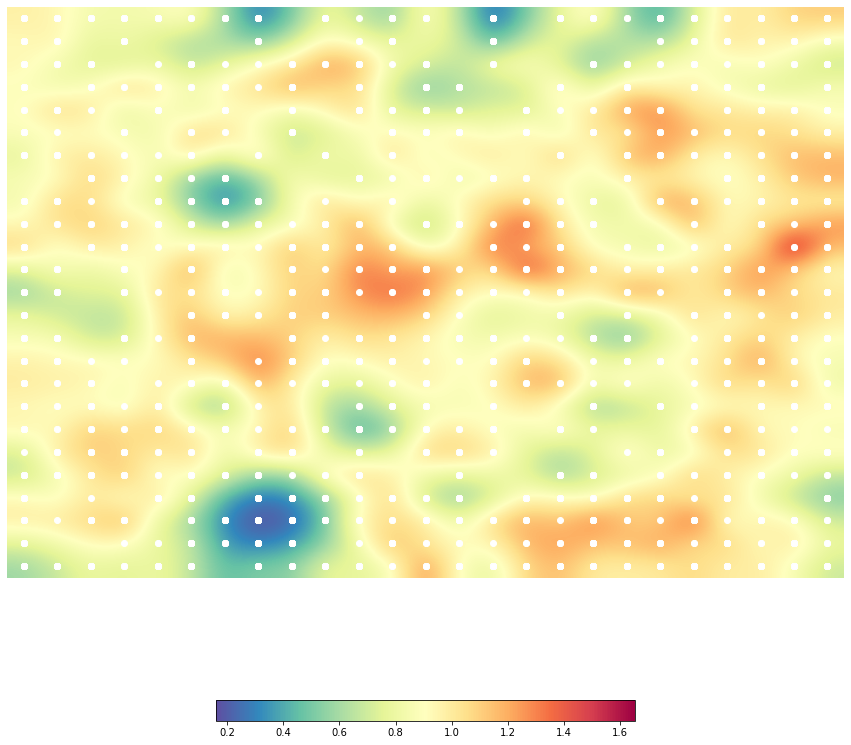

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15,15))

In [ ]:
n_rows, n_columns = 30, 30
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False, kerneltype=1)
%time som.train(data=final_set, epochs=100)

CPU times: user 4h 3min 41s, sys: 25.6 s, total: 4h 4min 7s
Wall time: 2h 3min 25s


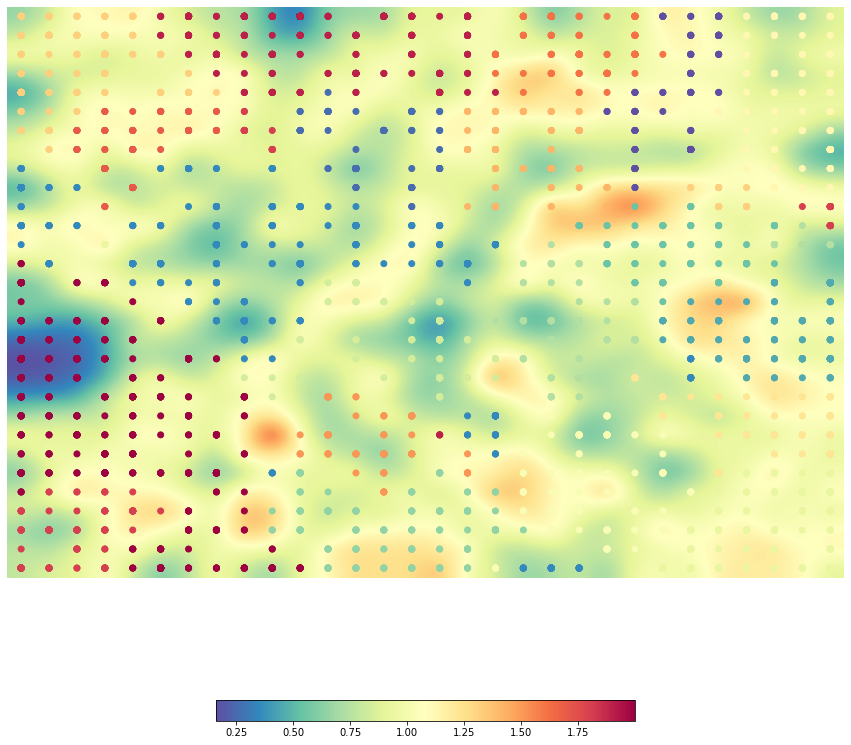

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15,15))


## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύσαμε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύσαμε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. Σημειώστε ότι μπορεί να έχουμε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


Η παραπάνω διαδικασία ολοκληρώθηκε μα βάση των δοθέντα κώδικα από το αντίστοιχο Notebook του εργαστηρίου.

In [ ]:
bmus = som.bmus

In [ ]:
print(bmus.shape)

(5000, 2)


In [ ]:
print(bmus)

[[ 6  8]
 [17 10]
 [ 2  0]
 ...
 [ 1 19]
 [ 9  0]
 [16  1]]


In [ ]:
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(ubmus)

[[ 0  0]
 [ 0  1]
 [ 0  2]
 ...
 [29 27]
 [29 28]
 [29 29]]


In [ ]:
print(indices)

[153 382  53 ...  43 208 353]



## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.


In [ ]:
#χρήση κώδικα εργαστηρίων για kmeans
from sklearn.cluster import KMeans
num_of_clusters=25 #ορισμός αριθμού των clusters ο οποίος προέκυψε έπειτα από πειραματισμό ώστε να δίνει
#τα βέλτιστα αποτελέσματα
kmeans = KMeans(n_clusters=num_of_clusters)

In [ ]:
som.cluster(algorithm=kmeans)
clusters = som.clusters
print(clusters)

[[18 18 18 18 18 22 22 22 22 22 22 22  7  7  7  7 21 21 19 19 19 19 19 19
  13 13 17 17 17 17]
 [18 18 18 18 18 22 22 22 22 22 22 22 22  7  7  7 21  7 19 19 19 19 19 19
  13 13 17 17 17 17]
 [18 18 18 18 18 22 22 22 22 22 22 22 22 22  7  7  7  7 19 19 19 19 19 19
  13 13 17 17 17 17]
 [18 18 18 18 18 18 22 22 22 22 22 22 22 22  7  7  7  7 19 19 19 19 19 13
  13 13 17 17 17 17]
 [18 18 18 18 16 16 18 22 22 22 22 11 22 22  7  7  7  7 19 19 19 19 13 13
  13 13 17 17 17 17]
 [18 18 16 16 16 16 16  1  1 22 11 11 11 11 11  7  7  2  2  2  2 13 13 13
  13 17 17 17  5  5]
 [18 16 16 16 16 16 16  1  1  1 11 11 11 11 11 11  2  2  2  2  2  2 13 13
   5  5  5  5  5  5]
 [ 4 16 16 16 16 16  4  4  1  1  1 11 11 11 11 11  2  2  2  2  2  2  2  5
   5  5  5  5  5  5]
 [ 4  4 16 16 16  4  4  4  4  4  4 11 11 11 11 11  2  2  2  2  2  2  2  2
   5  5  5  5  5  5]
 [ 4  4  4 16  4  4  4  4  4  4  4 11 11 11 11 11  2  2  2  2  2  2  2  5
  18 18 12  5  5  5]
 [ 4  4  4 16  4  4  4  4  4  4  4  4  7  7 11  4 


## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσουμε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. 


In [ ]:
joblib.dump(som, 'som.pkl')

['som.pkl']


## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήσαμε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Δεν τυπώνουμε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώσαμε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώσαμε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκουμε εύκολα τα μεγάλα και μικρά clusters. 

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">



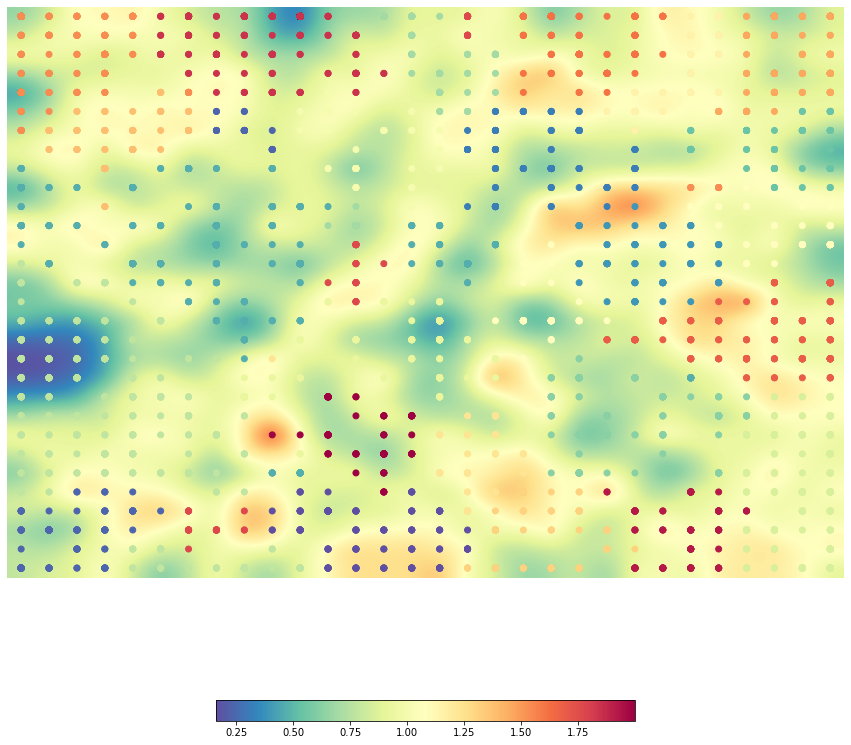

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
#Τυπώνουμε ξανά τον U-matrix αφού ζητείται από την εκφώνηση
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15,15))

In [ ]:
print(som.clusters)

[[18 18 18 18 18 22 22 22 22 22 22 22  7  7  7  7 21 21 19 19 19 19 19 19
  13 13 17 17 17 17]
 [18 18 18 18 18 22 22 22 22 22 22 22 22  7  7  7 21  7 19 19 19 19 19 19
  13 13 17 17 17 17]
 [18 18 18 18 18 22 22 22 22 22 22 22 22 22  7  7  7  7 19 19 19 19 19 19
  13 13 17 17 17 17]
 [18 18 18 18 18 18 22 22 22 22 22 22 22 22  7  7  7  7 19 19 19 19 19 13
  13 13 17 17 17 17]
 [18 18 18 18 16 16 18 22 22 22 22 11 22 22  7  7  7  7 19 19 19 19 13 13
  13 13 17 17 17 17]
 [18 18 16 16 16 16 16  1  1 22 11 11 11 11 11  7  7  2  2  2  2 13 13 13
  13 17 17 17  5  5]
 [18 16 16 16 16 16 16  1  1  1 11 11 11 11 11 11  2  2  2  2  2  2 13 13
   5  5  5  5  5  5]
 [ 4 16 16 16 16 16  4  4  1  1  1 11 11 11 11 11  2  2  2  2  2  2  2  5
   5  5  5  5  5  5]
 [ 4  4 16 16 16  4  4  4  4  4  4 11 11 11 11 11  2  2  2  2  2  2  2  2
   5  5  5  5  5  5]
 [ 4  4  4 16  4  4  4  4  4  4  4 11 11 11 11 11  2  2  2  2  2  2  2  5
  18 18 12  5  5  5]
 [ 4  4  4 16  4  4  4  4  4  4  4  4  7  7 11  4 

In [ ]:
#Αριθμός νευρώνων ανά cluster με χρήση της np.unique
number_n = np.unique(clusters,return_counts=True)
for i in range(0,2):
 print("Cluster", i, "->Number of neurons:", number_n[i])


Cluster 0 ->Number of neurons: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Cluster 1 ->Number of neurons: [ 33  30  40  29 107  25  45  27 101  37  42  28  41  19  20  25  23  23
  31  27  39  21  40  20  27]


In [ ]:
#Αύξουσα ταξινόμηση clusters με βάση τον αριθμό των νευρώνων με χρήση της np.argsort
sorted_n=np.argsort(number_n[1])
print("Clusters sorted by increasing number of neurons:")
print(sorted_n)
print(number_n[1][sorted_n])

Clusters sorted by increasing number of neurons:
[13 23 14 21 17 16  5 15 24 19  7 11  3  1 18  0  9 20  2 22 12 10  6  8
  4]
[ 19  20  20  21  23  23  25  25  27  27  27  28  29  30  31  33  37  39
  40  40  41  42  45 101 107]



## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης με το tf-idf και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορούμε να υλοποιήσουμε τη συνάρτηση αυτή όπως θέλουμε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

Μπορουμε βέβαια να προσθέσουμε οποιαδήποτε επιπλέον έξοδο μας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
   

In [ ]:
from prettytable import PrettyTable

def print_categories_stats(movieids):
  categories_in_total = []  #δημιουργία κενής λίστας του συνόλου των κατηγοριών
  for movieid in movieids:
    moviecategories = categories[movieid][0].split(",  ") #αφαίρεση ανεπιθύμητων συμβόλων από τα categories string κάθε ταινίας
    moviecategories = [x.strip('""') for x in moviecategories]
    categories_in_total.extend(moviecategories) #προσθήκη των στοιχείων του moviecategories (λίστα μετά τις αλλαγές μας) στην συνολική λίστα κατηγοριών
  uniquecategories, count = np.unique(categories_in_total, return_counts = True) #μέτρηση συχνότητας μοναδικών ετικετών κατηγοριών 
  sorted = reversed(np.argsort(count)) #ταξινόμηση κατηγοριών με βάση την συχνότητα εμφάνισης (επιστρέφει τα indices η np.argsort()) και αντιστροφή της ακολουθίας της λίστας για να έχουμε φθίνουσα σειρά (reversed())
  x = PrettyTable() #δημιουργία απλού πίνακα παρουσίασης των δεδομένων
  x.field_names = [" ", "Category", "Count"] #τίτλοι στηλών πίνακα
  y = 0
  for i in sorted:
   y = y + 1
   x.add_row([y, uniquecategories[i], count[i]]) #γέμισμα του πίνακα με τα δεδομένα (κατηγορία, συχνότητα)
  print(x)

print_categories_stats(list(range(0,5000))) 

+-----+------------------------------------------+-------+
|     |                 Category                 | Count |
+-----+------------------------------------------+-------+
|  1  |                  Drama                   |  2309 |
|  2  |                  Comedy                  |  1201 |
|  3  |                 Thriller                 |  801  |
|  4  |               Romance Film               |  735  |
|  5  |                  Action                  |  712  |
|  6  |               World cinema               |  614  |
|  7  |              Crime Fiction               |  524  |
|  8  |                  Horror                  |  481  |
|  9  |             Black-and-white              |  473  |
|  10 |                  Indie                   |  431  |
|  11 |             Action/Adventure             |  426  |
|  12 |                Adventure                 |  422  |
|  13 |                Short Film                |  411  |
|  14 |               Family Film                |  391 

In [ ]:
import numpy as np
def print_cluster_neurons_movies_report(cluster_number):
  bmus_cluster_coordinates = np.where(clusters == cluster_number) #εύρεση συντεταγμένων των bmus απο τον πίνακα των clusters
  bmus_cluster_coordinates = np.column_stack((bmus_cluster_coordinates[0], bmus_cluster_coordinates[1])) #μονοδιάστατοι πίνακες μπαίνουν ως στήλες για την δημιουργία δισδιάστατου πίνακα (ίδια μορφή με τον αρχικό πίνακα bmus)
  list_index = [] #δημιουργία κενής λίστας για indices νευρώνων 
  for i in bmus_cluster_coordinates:
    for j in range(0, len(ubmus)):
      if (np.array_equal(ubmus[j], i)): #έλεγχος για κάθε bmu του πίνακα bmus_cluster_coordinates αν υπάρχει στον αρχικό πίνακα μοναδικών bmus
        list_index.append(j)            #αν ο έλεγχος είναι True προστίθεται με append() το index του νευρώνα του συγκεκριμένου bmu στην λίστα
  list_index = np.array(list_index) #μετατροπή της λίστας list_index σε πίνακα  
  print('Cluster:', cluster_number)
  movieids = neuron_movies_report(list_index) #κλήση της neuron_movies_report για επιστροφή των ids των ταινιών του νευρώνα με τάδε index 
  print_categories_stats(movieids) #κλήση της print_categories_stats για επιστροφή, σε μορφή πίνακα, των στατιστικών των κατηγοριών των ταινιών που έχουν ανατεθεί στον νευρώνα
  return list_index


In [ ]:
def neuron_movies_report(neuronids):
  movieids = [] #δημιουργία λίστας του συνόλου ταινιών του νευρώνα
  for id in neuronids:
    movies_from_report = np.where(indices == id)[0] #εύρεση indices των ταινιών από τον πίνακα του νευρώνα
    movieids.extend(movies_from_report) #προσθήκη των στοιχείων από movies_from_report στην λίστα συνολικών ταινιών του νευρώνα
  return movieids

In [ ]:
for i in range(0, num_of_clusters):
 print_cluster_neurons_movies_report(i)

Cluster: 0
+----+------------------------+-------+
|    |        Category        | Count |
+----+------------------------+-------+
| 1  |         Drama          |  178  |
| 2  |        Thriller        |  178  |
| 3  |        Mystery         |   65  |
| 4  |     Crime Fiction      |   64  |
| 5  | Psychological thriller |   32  |
| 6  |     Crime Thriller     |   31  |
| 7  |      World cinema      |   25  |
| 8  |         Horror         |   22  |
| 9  |       Film noir        |   16  |
| 10 |    Black-and-white     |   15  |
| 11 |         Indie          |   14  |
| 12 |        Suspense        |   11  |
| 13 |      Romance Film      |   9   |
| 14 |    Film adaptation     |   8   |
| 15 |    Science Fiction     |   8   |
| 16 |    Television movie    |   7   |
| 17 |         Comedy         |   6   |
| 18 |      Period piece      |   6   |
| 19 |   Political thriller   |   6   |
| 20 |      Supernatural      |   5   |
| 21 |    Political drama     |   5   |
| 22 |    Courtroom Drama    



## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM



**Παρακάτω φαίνονται τα clusters σε μορφή εικόνας ώστε να είναι πιο ευδιάκριτος ο χάρτης.**

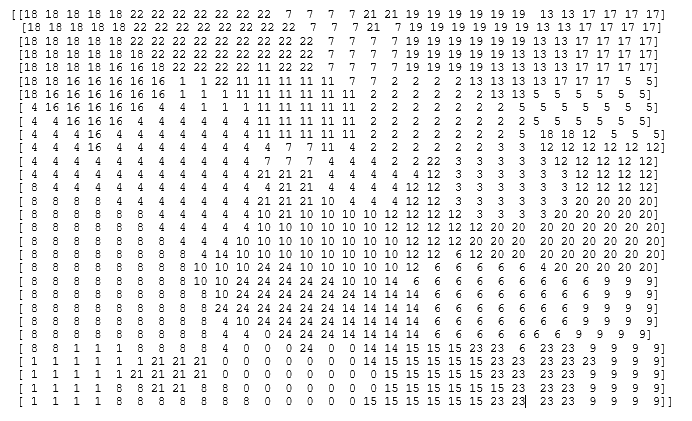

### **Γενικές Παρατηρήσεις**

Όπως εξηγήθηκε και παραπάνω η ορθή επιλογή των παραμέτρων εκπαίδευσης φαίνεται μέσα από τον U-Matrix. Ένα άλλο στοιχείο το οποίο το επιβεβαιώνει είναι ότι, όπως φαίνεται και στον χάρτη που παρουσιάζεται παραπάνω, οι όμοιοι αριθμοί είναι συγκεντρωμένοι σε ομάδες και όχι διάσπαρτα (πχ. τα 8 βρίσκονται τέρμα αριστερά, τα 24 κάτω στο κέντρο κοκ.). Τέλος, αξίζει να σημειωθεί ότι στην πλεινότητα των clusters οι κατηγορίες εκείνες οι οποίες συναντώνται συχνότερα (δηλ. 2-3 πρώτες σε πλήθος) είναι αρκετά παρόμοιες.

Ενδεικτικά στο cluster 0 οι πρώτες 3 κατηγορίες ταινιών είναι: 1. Drama, 2. Thriller, 3. Mystery, αλλά και στο cluster 15 έχουμε: 1.Crime Fiction, 2.Thriller, 3. Crime Thriller (μάλιστα στο συγκεκριμένο cluster σχεδον όλες οι ταινίες του top15 ανήκουν σε παρόμοια κινηματογραφικά είδη).

### **1.Πυκνότητα Πιθανότητας**

Με βάση τα όσα προέκυψαν από τον SOM μας επιβεβαιώνεται ότι τα δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας.

Πιο συγκεκριμένα, οι πιο συχνές κατηγορίες του data set μας, άρα κι εκείνες με τη μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου είναι οι: **Drama** και **Comedy**. Κάποια clusters τα οποία έχουν ως πρώτη σε πλήθος ταινιών κατηγοριά το Drama είναι τα: 1, 5, 7, 8, 13, 17. Παρατηρούμε λοιπόν ότι αυτά δεν είναι συγκεντρωμένα σε ένα μόνο σημείο του χάρτη αλλά βρίσκονται διάσπαρτα ανα ν-άδες. Λόγου χάρη τα clusters 1 είναι κάτω αριστερά, τα 5, 13 και 17 πάνω δεξιά και το 7 πάνω κεντρικά. Αντίστοιχα, clusters στα οποιά κυριαρχεί το Comedy όπως τα 2, 4, 16 εκτείνονται από την κέντρο-αριστερή έως και την κέντρο-δεξιά πλευρά του χάρτη.

Από την άλλη, τα είδη **Animation**, **Family Film** και **Short Film** έχουν μικρή πυκνότητα πιθανότητας στο χώρο της εισόδου. Έτσι, τα clusters στα οποία αυτά είναι κυρίαρχα είδη, δηλαδή τα 3, 12, 20, εντοπίζονται σε μία μικρή κεντρική περιοχή της δεξιάς πλευράς του χάρτη.

 



###**2.Μακρινά Πρότυπα Εισόδου**

Πράγματι παρατηρούμε ότι κατά κύριο λόγο, μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτή. 

Τα clusters στα οποία η πλειονότητα των ταινιών είναι Drama καταλαμβάνουν κυρίως την πάνω δεξιά πλευρά του χάρτη(5, 13, 17, 19) ενώ εκείνα στα οποία είναι το Comedy έχουν κυρίως το κέντρο-αριστερό κομμάτι. Βέβαια επειδή αυτά τα είδη καταλαμβάνουν την πλειονότητα του χάρτη είναι δύσκολο να μην συνορεύουν σε ορισμένα σημεία.

Παράλληλα παρατηρούμε πως τα clusters στα οποία κυριαρχεί το είδος των Thriller και Horror ταινιών (0,14,24) συναντώνται στο κάτω κεντρικό κομμάτι, ενώ τα clusters των Animation και Family Films τέρμα δεξιά. 

###**3.Κοντινά Πρότυπα Εισόδου**

Αντίστοιχα με παραπάνω, τα κοντινά πρότυπα εισόδου θα βρίσκονται σε κοντινά σημεία του χάρτη.

Αρχικά, βλέπουμε ότι τα clusters που έχουν Drama ή Horror/Thriller τα οποία είναι συγγενή κινηματογραφικά είδη είναι αρκετά κοντά στο χάρτη και καταλαμβάνουν εξ'ολοκλήρου το πάνω μέρος του χάρτη (18,22,7,19,13,17,5 κλπ). Γειτονικά του 5 το οποίο έχει κυρίως Drama αλλά περιέχει και ένα σεβαστό πλήθος Family Film, βρίσκεται το 12 που έχει κυρίως Family Film και κάτω από το 12 βρίσκεται το 20 που έχει κυρίως Adventure και Animation (άρα γίνεται μια ομαλή, θα λέγαμε, μετάβαση από το ένα είδος στο άλλο). Στη συνέχεια, κάτω από το 20 συναντάμε κυρίως τα clusters 6 και 9 στα οποία κυριαρχούν οι Adventure και Action ταινίες. Έπειτα, γειτονικά του 9 βρίσκεται το 23 το οποίο περιέχει ταινίες Action, Adventure, Thriller και Crime Fiction με τις 4 κατηγορίες να υπάρχουν όλες σε μεγάλο πλήθος, ενώ όσο πηγαίνουμε αριστερά του 23 αρχίζουν και πάλι οι τανίες Horror και Thriller (άρα και πάλι έχουμε ομαλή μετάβαση). Παράλληλα το

Τα παραδείγματα που αναφέρονται παραπάνω είναι ενδεικτικά. Γενικά βλέπουμε ότι όταν υπάρχει γειτνίαση μεταξύ 2 ή περισσότερων clusters, αυτοί θα έχουν τουλάχιστον 1 κινηματογραφικό είδος το οποίο κυριαρχεί σε αυτά κοινό, με κάθε μετάβαση από ένα cluster σε ένα άλλο να γίνεται σταδιακά. Δηλαδή αν το cluster x έχει Drama-Horror, το διπλανό του cluster y θα έχει Horror-Thriller και το διπλανό cluster του y, z θα έχει Thriller-Adventura (κάτι σαν την μεταβατική ιδιότητα στα μαθηματικά).

###**Ιδιαίτερες περιπτώσεις**

Φυσικά, υπήρχαν και περιπτώσεις οι οποίες αποτέλεσαν την εξαίρεση στον κανόνα και μία από αυτές ήταν και η περίπτωση του cluster 11. Στο cluster αυτό κυρίαρχο κινηματογραφικό είδος είναι το Western το οποίο περιέχονταν σε πολύ μικρότερο ποσοστό σε σχέση με το άλλα είδη στο δικό μας data set (το Drama είναι πρώτο με 2309 ταινίες ενώ το Western 34o με 118 ταινίες!). Επίσης, ενώ πρόκειται για ένα πολύ μικρό cluster σε σχέση με τα υπόλοιπα, καταλαμβάνει ενα σεβαστό κομμάτι του χάρτη και συνορεύει με είδη που δεν είναι τόσο συγγενή του όπως το Horror (22) και το Comedy (4), αντί για το Action/Adventure που θα άρμοζε καλύτερα.

Συμπερασματικά, η μέθοδος SOM είναι πολλά υποσχόμενη και μπορεί να μας παρέχει άρτια και ασφαλή αποτελέσματα σε ένα αρκετά ικανοποιητικό ποσοστό. Βέβαια, υπήρξαν και κάποια σημεία τα οποία ήταν ατελή στα οποία δεν αξίζει να σταθούμε καθώς η επίδοση στο σύνολό της ήταν πολύ καλή.
